### QUESTION 1: Explore the Dataset


A. Computer the sparsity of the movie rating dataset

In [ ]:
!pip install surprise

In [ ]:
import pandas as pd
from surprise import KNNWithMeans
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold

In [ ]:
# This block accesses your google drive directory to read the csv
from google.colab import drive
import pandas as pd
import csv
import numpy as np

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Synthetic_Movie_Lens/ratings.csv'

# Test that the csv is mounted without error
df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,userId,movieId,rating,timestamp
0,0,496,112852,3.0,1415520462
1,1,391,1947,4.0,1030945141
2,2,387,1562,1.5,1095041022
3,3,474,2716,4.5,1053020930
4,4,483,88125,4.5,1311337237


In [ ]:
file_path = '/content/drive/MyDrive/Synthetic_Movie_Lens/movies.csv'

# Test that the csv is mounted without error
movies_df = pd.read_csv(file_path)
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# Extracting users, movies, and ratings
users = df['userId'].values
n_users = df['userId'].nunique()

movies = df['movieId'].values
n_movies = df['movieId'].nunique()

ratings = df['rating'].values

# Creating a dictionary for movie ratings
movie_rating = {}
for i in range(len(ratings)):
    if movies[i] not in movie_rating:
        movie_rating[movies[i]] = [ratings[i]]
    else:
        movie_rating[movies[i]].append(ratings[i])

# Calculating the sparsity of the dataset
total_possible_ratings = n_users * n_movies
actual_ratings = len(df)
sparsity = actual_ratings / total_possible_ratings

print('Sparsity of MovieLens Dataset:', sparsity)


Sparsity of MovieLens Dataset: 0.016999683055613623


B. Plot a histogram showing the frequency of the rating values

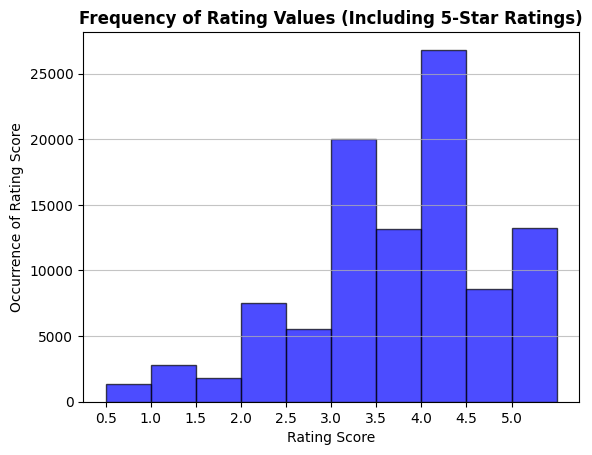

In [ ]:
import matplotlib.pyplot as plt

plt.hist(ratings, bins=np.arange(0.5, 5.5+0.5, 0.5), align='mid', edgecolor='black', color='blue', alpha=0.7)
plt.xticks(np.arange(0.5, 5.5, step=0.5))
plt.xlabel('Rating Score')
plt.ylabel('Occurrence of Rating Score')
plt.title('Frequency of Rating Values (Including 5-Star Ratings)', fontweight='bold')
plt.grid(axis='y', alpha=0.75)
plt.show()


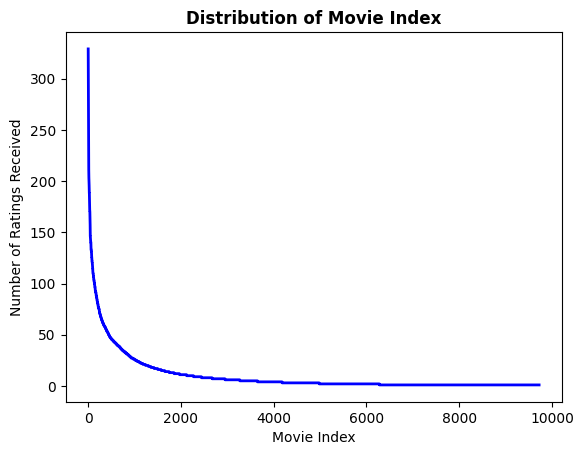

In [ ]:
movie_counts = df['movieId'].value_counts()

# Creating tuples of (movie count, movie index)
movie_tuples = list(zip(movie_counts.values, movie_counts.index))
movie_tuples.sort(reverse=True)

# Plot
plt.plot([m[0] for m in movie_tuples], linewidth=2, color='b')
plt.xlabel('Movie Index')
plt.ylabel('Number of Ratings Received')
plt.title('Distribution of Movie Index', fontweight='bold')
plt.show()


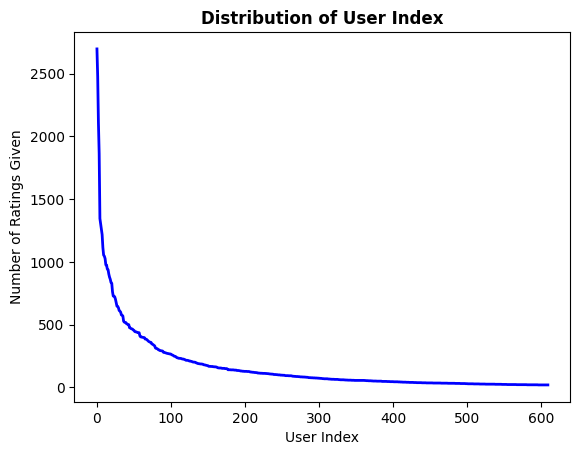

In [ ]:
user_counts = df['userId'].value_counts()

# Creating tuples of (user count, user index)
user_tuples = list(zip(user_counts.values, user_counts.index))
user_tuples.sort(reverse=True)

# Plot
plt.plot([u[0] for u in user_tuples], linewidth=2, color='b')
plt.xlabel('User Index')
plt.ylabel('Number of Ratings Given')
plt.title('Distribution of User Index', fontweight='bold')
plt.show()


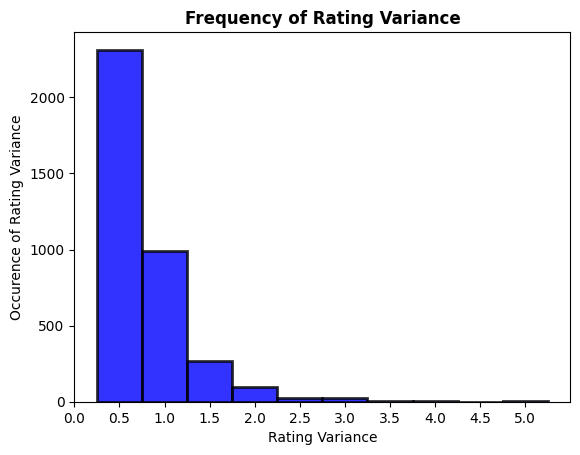

In [ ]:
rating_variance = [[m,np.var(movie_rating[m])] for m in movie_rating]
rating_var = second_values = [t[1] for t in rating_variance]
plt.hist(rating_var,bins=np.arange(0.5, 5.5+0.5, 0.5), align = 'left',
        edgecolor='k', facecolor='b', linewidth=2, alpha=0.8)
plt.xticks(np.arange(0, 5.5, step=0.5))
plt.xlabel("Rating Variance")
plt.ylabel("Occurence of Rating Variance")
plt.title("Frequency of Rating Variance", fontweight='bold')
plt.show()

array([112852,   1947,   1562, ...,    276,    168,   2407])

QUESTION 4: Design a k-NN collaborative filter

In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163006 sha256=613fefefa25ea796c537f1663f18efb762809fbe8fd40c8cb49d1a865f8d9b64
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
from surprise import Reader
from surprise import Dataset

reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(df[['userId','movieId','rating']], reader)

In [ ]:
data2 = Dataset.load_from_df(df[['userId','movieId','rating']], reader)
data2.raw_ratings

[(496, 112852, 3.0, None),
 (391, 1947, 4.0, None),
 (387, 1562, 1.5, None),
 (474, 2716, 4.5, None),
 (483, 88125, 4.5, None),
 (375, 344, 4.0, None),
 (438, 4388, 2.5, None),
 (534, 98491, 4.0, None),
 (288, 2719, 2.0, None),
 (288, 1287, 4.0, None),
 (266, 135, 1.0, None),
 (414, 1040, 3.0, None),
 (599, 2291, 4.0, None),
 (381, 52975, 4.0, None),
 (474, 3125, 4.0, None),
 (182, 3997, 3.0, None),
 (301, 46578, 4.0, None),
 (338, 27773, 4.0, None),
 (391, 10, 3.0, None),
 (606, 32862, 4.0, None),
 (76, 6539, 2.0, None),
 (606, 6789, 4.0, None),
 (477, 5449, 4.0, None),
 (510, 27790, 3.0, None),
 (605, 900, 3.0, None),
 (288, 30825, 3.5, None),
 (290, 1213, 5.0, None),
 (465, 111, 5.0, None),
 (346, 7013, 4.0, None),
 (280, 8638, 4.5, None),
 (388, 33615, 5.0, None),
 (525, 26662, 4.0, None),
 (21, 3462, 3.0, None),
 (599, 5016, 3.0, None),
 (187, 27660, 4.5, None),
 (610, 71910, 2.5, None),
 (150, 648, 4.0, None),
 (480, 1320, 2.0, None),
 (520, 59315, 5.0, None),
 (341, 115149, 3.5,

In [ ]:
# Use person correlation coefficient
sim_options = {'name': 'pearson',
               'user_based': True  # Compute similarities between users
               }

# Swipe k from 2 to 100 in step sizes of 2
ks = range(2, 102, 2)

# Store mean RMSE and MAE
RMSEs = []
MAEs = []

for k in ks:
    # Use KNN model with the mean ratings of each user
    algo_all = KNNWithMeans(k=k, sim_options=sim_options)

    # Cross validation
    result_dict = cross_validate(algo_all, data, measures=['RMSE', 'MAE'], cv=10, verbose=False)
    RMSEs.append(np.average(result_dict['test_rmse']))
    MAEs.append(np.average(result_dict['test_mae']))

# Print the average results
print('Average RMSE:\n', RMSEs,
      '\nAverage MAE:\n', MAEs)

Average RMSE:

 [1.0191455440376331, 0.945921427174504, 0.9200198678486521, 0.9078205046261253, 0.9014900500394459, 0.8970543898490098, 0.8959340204679627, 0.8943389523765077, 0.8926287603970435, 0.8917062822567987, 0.8918878892489396, 0.8908229663708072, 0.8899187077141703, 0.8901955038511595, 0.8896306596306761, 0.8907643822478327, 0.890198780020332, 0.8902323600356989, 0.8888590131479039, 0.88949135576914, 0.8893265323143831, 0.890053565805619, 0.8899243778450001, 0.8901732333944267, 0.8894449820496504, 0.8889403426913344, 0.8903305453652275, 0.8894363100464714, 0.8897011885462336, 0.8900661076823739, 0.8890582443511164, 0.8905246060496769, 0.8900323966568859, 0.8898534132443092, 0.8904160526789253, 0.8894034396150037, 0.8906396793685879, 0.8907688114963536, 0.8906117065944217, 0.8910187474520441, 0.8903897779173484, 0.88928774896683, 0.8902230276951115, 0.8920159343495324, 0.8898854282199775, 0.8898380901081401, 0.8904967953615401, 0.8898809741879592, 0.891293906641175, 0.8918810164016401]


Average MAE:

 [0.7861180873938372, 0.7268222745467301, 0.7048579670006965, 0.6939230506910992, 0.6886863220839492, 0.684610741733521, 0.6833065192179704, 0.6816609898074052, 0.6802149302959786, 0.6795092041108901, 0.6793072085382531, 0.6789892349190805, 0.678175393779006, 0.6781282359124148, 0.677069163815757, 0.6779688601791252, 0.6777396226622279, 0.6776948875175592, 0.6766497806244252, 0.6775265220537281, 0.677327967563387, 0.6776455058563956, 0.6774850439261378, 0.6775855341517769, 0.6768122764116249, 0.6769747739790536, 0.677785762859619, 0.6774766721665569, 0.6774613038339303, 0.677648990324714, 0.6772307017371759, 0.6780735796005095, 0.677681614804601, 0.6776860708664418, 0.6777881844875011, 0.6773999673149995, 0.6783144987606494, 0.6780324045569094, 0.6784853249852248, 0.6787368193855714, 0.6782392707112352, 0.677197685274109, 0.6781368173331483, 0.67891025305105, 0.67790948564462, 0.6780217666518633, 0.6777447636767541, 0.67780988518234, 0.6788920161632296, 0.6786549564040425]

QUESTION 5: Use the plot from question 4, to find a ’minimum k’.

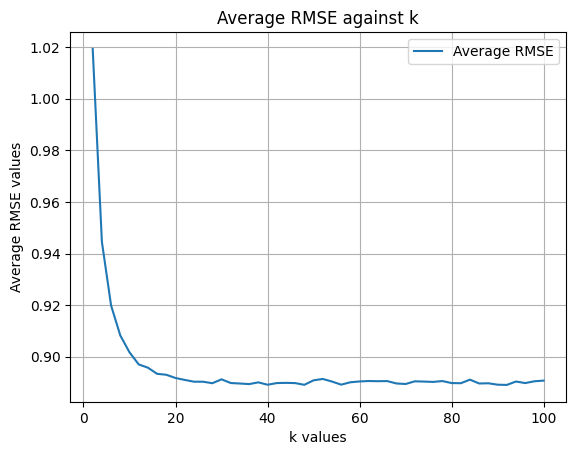

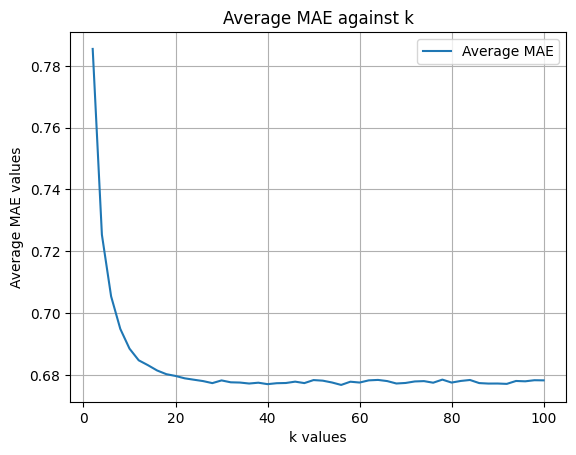

In [ ]:
# Plot the RMSE graph
plt.figure(1)
plt.title("Average RMSE against k")
plt.plot(ks, RMSEs, label='Average RMSE')
plt.xlabel('k values')
plt.ylabel('Average RMSE values')
plt.legend()
plt.grid()
plt.show()

# Plot the MAE graph
plt.figure(2)
plt.title("Average MAE against k")
plt.plot(ks, MAEs, label='Average MAE')
plt.xlabel('k values')
plt.ylabel('Average MAE values')
plt.legend()
plt.grid()
plt.show()

In [ ]:
RMSEs = np.array(RMSEs)
MAEs = np.array(MAEs)

In [ ]:
mink_RMSE = np.argmin(RMSEs)
mink_MAE = np.argmin(MAEs)

From the plot, min k = 24
Steady-state RMSE is 0.89, Steady-state MAE for 0.67767

In [ ]:
np.mean(RMSEs[12:])

0.8900565778540311

In [ ]:
np.mean(MAEs[12:])

0.6776772727028182

QUESTION 6: Within EACH of the 3 trimmed subsets in the dataset, design (train and
validate)

In [ ]:
from surprise import accuracy

def knn_evaluate_trim_performance(trimming, k, random_state):
    knn = KNNWithMeans(k=k, min_k=1, sim_options={'name': 'pearson'}, verbose=False)
    rmse = []
    for trainset, testset in KFold(n_splits=10, random_state=random_state).split(R):
        knn.fit(trainset)
        if trimming == 'popular':
            trimmed_testset = popular_trimming(testset, frequency)
        elif trimming == 'unpopular':
            trimmed_testset = unpopular_trimming(testset, frequency)
        elif trimming == 'high variance':
            trimmed_testset = high_variance_trimming(testset, frequency, variance)
        pred = knn.test(trimmed_testset)
        rmse.append(accuracy.rmse(pred, verbose=False))
    print('k: %s | RMSE: %f' %(k, np.mean(rmse)))
    return np.mean(rmse)

In [ ]:
unique_values, frequencies = np.unique(movies, return_counts=True)
# Create a frequency array with values and their frequencies
movies_rating_frequency = np.column_stack((unique_values, frequencies))

In [ ]:
# Use person correlation coefficient
sim_options = {'name': 'pearson',
               'user_based': True  # Compute similarities between users
               }

# Swipe k from 2 to 100 in step sizes of 2
ks = range(2, 102, 2)

# Store mean RMSE and MAE
RMSEs_popular = []
MAEs_popular = []

trim_movies = movies_rating_frequency[movies_rating_frequency[:, 1] > 2]
trim_movies_vals = trim_movies[:, 0]
trim_movies_set = set(trim_movies_vals)
data_popular = data2.raw_ratings
print(data_popular)

        # Define the condition for rows to keep (for example, keep rows with the second element of the tuple not equal to a certain value)
trim_dataset = [rating for rating in data_popular if rating[1] in trim_movies_set]
trim_dataset = np.array(trim_dataset)
# Column names
column_names = ['userId','movieId','rating']

# Create a DataFrame from the NumPy array with column names
print(trim_dataset.shape)


In [ ]:
trim_dataset = pd.DataFrame(trim_dataset[:, :-1], columns=column_names)
trim_dataset = Dataset.load_from_df(trim_dataset[['userId','movieId','rating']], reader)
# # Create a new DatasetAutoFolds object with the filtered data
#trim_dataset = Dataset.load_from_file(trim_dataset, reader=data.reader)

for k in ks:
    # Use KNN model with the mean ratings of each user
    algo = KNNWithMeans(k=k, sim_options=sim_options)

    # Cross validation
    result_dict = cross_validate(algo, trim_dataset, measures=['RMSE', 'MAE'], cv=10, verbose=False)
    RMSEs_popular.append(np.average(result_dict['test_rmse']))
    MAEs_popular.append(np.average(result_dict['test_mae']))

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

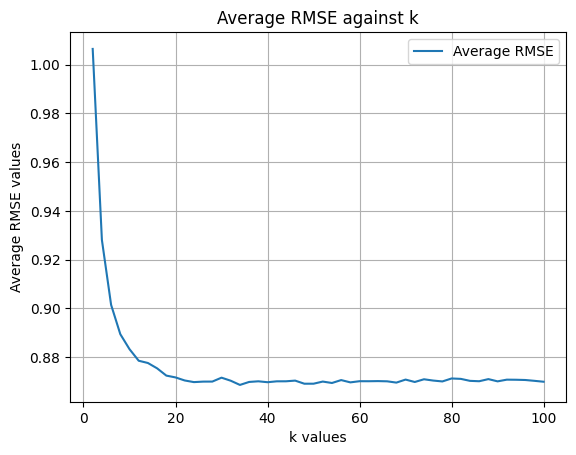

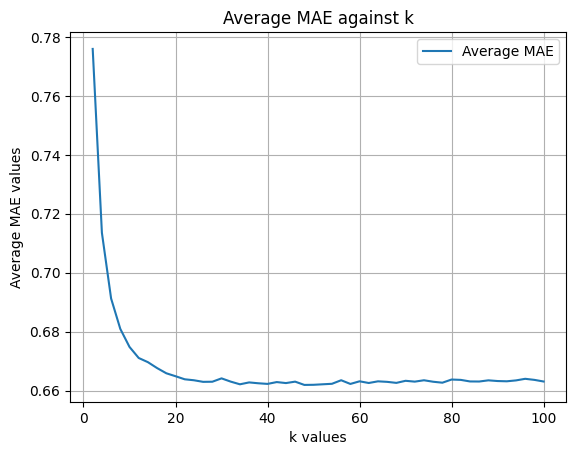

In [ ]:
plt.figure(1)
plt.title("Average RMSE against k")
plt.plot(ks, RMSEs_popular, label='Average RMSE')
plt.xlabel('k values')
plt.ylabel('Average RMSE values')
plt.legend()
plt.grid()
plt.show()

# Plot the MAE graph
plt.figure(2)
plt.title("Average MAE against k")
plt.plot(ks, MAEs_popular, label='Average MAE')
plt.xlabel('k values')
plt.ylabel('Average MAE values')
plt.legend()
plt.grid()
plt.show()

In [ ]:
mean_RMSE_popular = np.mean(RMSEs_popular)
print(mean_RMSE_popular)
mean_MAE_popular = np.mean(MAEs_popular)
print(mean_MAE_popular)

0.8758213293538326
0.6679385309038414


In [ ]:
# Use person correlation coefficient
sim_options = {'name': 'pearson',
               'user_based': True  # Compute similarities between users
               }

# Swipe k from 2 to 100 in step sizes of 2
ks = range(2, 102, 2)

# Store mean RMSE and MAE
RMSEs_unpopular = []
MAEs_unpopular = []

trim_movies = movies_rating_frequency[movies_rating_frequency[:, 1] <= 2]
trim_movies_vals = trim_movies[:, 0]
trim_movies_set = set(trim_movies_vals)
raw_data = data2.raw_ratings

# Define the condition for rows to keep (for example, keep rows with the second element of the tuple not equal to a certain value)
trim_dataset = [rating for rating in raw_data if rating[1] in trim_movies_set]
trim_dataset = np.array(trim_dataset)
# Column names
column_names = ['userId','movieId','rating']

# Create a DataFrame from the NumPy array with column names
trim_dataset = pd.DataFrame(trim_dataset[:, :-1], columns=column_names)
trim_dataset = Dataset.load_from_df(trim_dataset[['userId','movieId','rating']], reader)

for k in ks:
    # Use KNN model with the mean ratings of each user
    algo_unpopular = KNNWithMeans(k=k, sim_options=sim_options)

    # Cross validation
    result_dict = cross_validate(algo_unpopular, trim_dataset, measures=['RMSE', 'MAE'], cv=10, verbose=False)
    RMSEs_unpopular.append(np.average(result_dict['test_rmse']))
    MAEs_unpopular.append(np.average(result_dict['test_mae']))

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

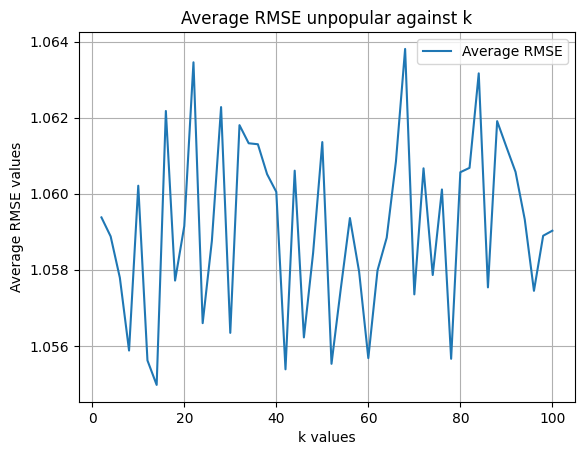

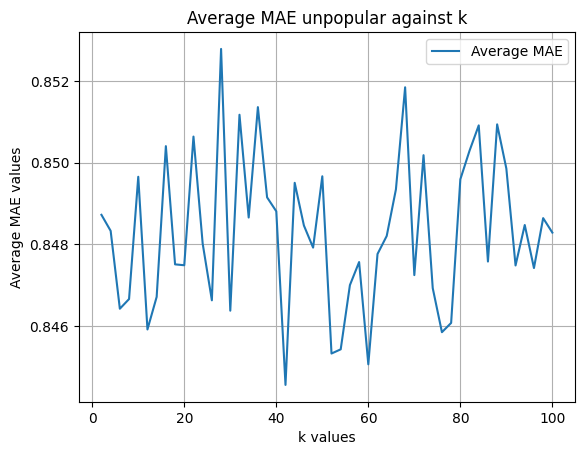

In [ ]:
plt.figure(1)
plt.title("Average RMSE unpopular against k")
plt.plot(ks, RMSEs_unpopular, label='Average RMSE')
plt.xlabel('k values')
plt.ylabel('Average RMSE values')
plt.legend()
plt.grid()
plt.show()

# Plot the MAE graph
plt.figure(2)
plt.title("Average MAE unpopular against k")
plt.plot(ks, MAEs_unpopular, label='Average MAE')
plt.xlabel('k values')
plt.ylabel('Average MAE values')
plt.legend()
plt.grid()
plt.show()

In [ ]:
mean_RMSE_unpopular = np.mean(RMSEs_unpopular)
print(mean_RMSE_unpopular)
mean_MAE_unpopular = np.mean(MAEs_unpopular)
print(mean_MAE_unpopular)

1.0591129012129927
0.848295065698325


In [ ]:
# Use person correlation coefficient
sim_options = {'name': 'pearson',
               'user_based': True  # Compute similarities between users
               }

# Swipe k from 2 to 100 in step sizes of 2
ks = range(2, 102, 2)

# Store mean RMSE and MAE
RMSEs_high_var = []
MAEs_high_var = []

trim_movies = movies_rating_frequency[movies_rating_frequency[:, 1] >=5]
trim_movies_vals = trim_movies[:, 0]
trim_movies_set = set(trim_movies_vals)

rating_variance = np.array(rating_variance)
trim_movies_2 = rating_variance[rating_variance[:, 1] >= 2]
trim_movies_set2 = set(trim_movies_2[:,0])
trim_movies_set = trim_movies_set.intersection(trim_movies_set2)

raw_data = data2.raw_ratings

# Define the condition for rows to keep (for example, keep rows with the second element of the tuple not equal to a certain value)
trim_dataset = [rating for rating in raw_data if rating[1] in trim_movies_set]
trim_dataset = np.array(trim_dataset)
# Column names
column_names = ['userId','movieId','rating']

# Create a DataFrame from the NumPy array with column names
trim_dataset = pd.DataFrame(trim_dataset[:,:-1], columns=column_names)
trim_dataset = Dataset.load_from_df(trim_dataset[['userId','movieId','rating']], reader)

for k in ks:
    # Use KNN model with the mean ratings of each user
    algo_high_var = KNNWithMeans(k=k, sim_options=sim_options)

    # Cross validation
    result_dict = cross_validate(algo_high_var, trim_dataset, measures=['RMSE', 'MAE'], cv=10, verbose=False)
    RMSEs_high_var.append(np.average(result_dict['test_rmse']))
    MAEs_high_var.append(np.average(result_dict['test_mae']))

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

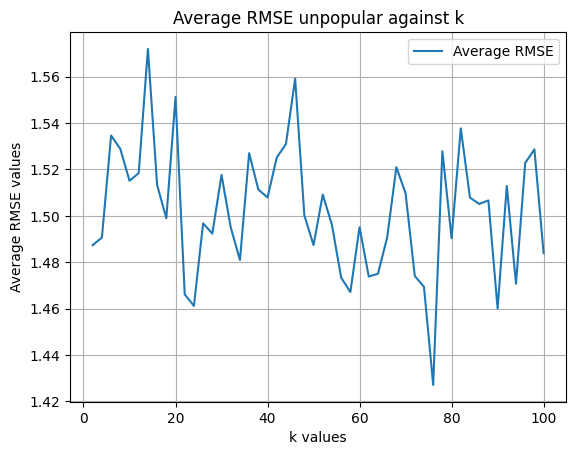

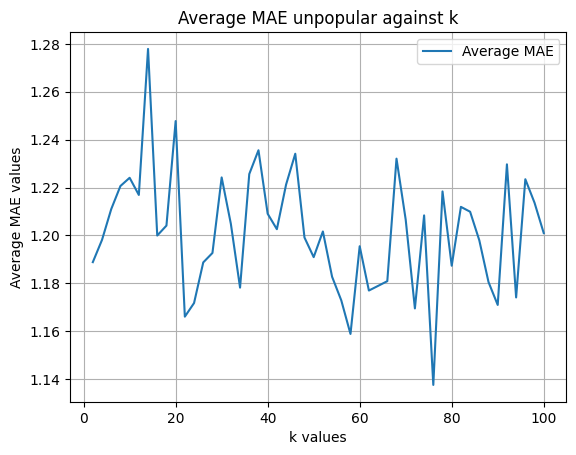

In [ ]:
plt.figure(1)
plt.title("Average RMSE unpopular against k")
plt.plot(ks, RMSEs_high_var, label='Average RMSE')
plt.xlabel('k values')
plt.ylabel('Average RMSE values')
plt.legend()
plt.grid()
plt.show()

# Plot the MAE graph
plt.figure(2)
plt.title("Average MAE unpopular against k")
plt.plot(ks, MAEs_high_var, label='Average MAE')
plt.xlabel('k values')
plt.ylabel('Average MAE values')
plt.legend()
plt.grid()
plt.show()

In [ ]:
mean_RMSE_high_var = np.mean(RMSEs_high_var)
print(mean_RMSE_high_var)
mean_MAE_high_var = np.mean(MAEs_high_var)
print(mean_MAE_high_var)

1.5021015107295261
1.201119935406806


Plot ROC curve

all data - algo_all

popluar data - algo

unpopular data - algo_unpopular

high_var_data - algo_high_var

In [ ]:
def get_data(keyword) :
  if keyword == 'all':
    return data
  if keyword == 'popular':
    trim_movies = movies_rating_frequency[movies_rating_frequency[:, 1] > 2]
    trim_movies_vals = trim_movies[:, 0]
    trim_movies_set = set(trim_movies_vals)

  elif keyword == 'unpopular':
    trim_movies = movies_rating_frequency[movies_rating_frequency[:, 1] > 2]
    trim_movies_vals = trim_movies[:, 0]
    trim_movies_set = set(trim_movies_vals)

  elif keyword == 'high_var':
    trim_movies = movies_rating_frequency[movies_rating_frequency[:, 1] >=5]
    trim_movies_vals = trim_movies[:, 0]
    trim_movies_set = set(trim_movies_vals)

    rating_variance = [[m,np.var(movie_rating[m])] for m in movie_rating]
    rating_variance = np.array(rating_variance)
    trim_movies_2 = rating_variance[rating_variance[:, 1] >= 2]
    trim_movies_set2 = set(trim_movies_2[:,0])
    trim_movies_set = trim_movies_set.intersection(trim_movies_set2)

  raw_data = data2.raw_ratings
  trim_dataset = [rating for rating in raw_data if rating[1] in trim_movies_set]
  trim_dataset = np.array(trim_dataset)
  column_names = ['userId','movieId','rating']
  trim_dataset = pd.DataFrame(trim_dataset[:,:-1], columns=column_names)
  trim_dataset = Dataset.load_from_df(trim_dataset[['userId','movieId','rating']], reader)
  return trim_dataset


In [ ]:
from surprise.model_selection import train_test_split
from surprise import KNNWithMeans

# The k in Question10

keywords = ['all', 'popular', 'unpopular', 'high_var']
min_k = 24

sim_options = {'name': 'pearson',
               'user_based': True  # compute  similarities between users
               }
algos =  {}
rating_true = {}
rating_predict = {}
for keyword in keywords:
  trim_data = get_data(keyword)
  trainset, testset = train_test_split(trim_data, test_size=.1)
  algo = KNNWithMeans(k=min_k, sim_options=sim_options)
  predictions = algo.fit(trainset).test(testset)
# Store true ratings and predicted ratings
  rating_true_arr = []
  rating_predict_arr = []

  for prediction in predictions:
      rating_true_arr.append(prediction[2])
      rating_predict_arr.append(prediction[3])

  rating_true[keyword] = rating_true_arr
  rating_predict[keyword] = rating_predict_arr
  algos[keyword] = algo

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


(10084,)
ROC with threshold =  2.5
(10084,)
ROC with threshold =  3
(10084,)
ROC with threshold =  3.5
(10084,)
ROC with threshold =  4
(9480,)
ROC with threshold =  2.5
(9480,)
ROC with threshold =  3
(9480,)
ROC with threshold =  3.5
(9480,)
ROC with threshold =  4
(9480,)
ROC with threshold =  2.5
(9480,)
ROC with threshold =  3
(9480,)
ROC with threshold =  3.5
(9480,)
ROC with threshold =  4
(25,)
ROC with threshold =  2.5
(25,)
ROC with threshold =  3
(25,)
ROC with threshold =  3.5
(25,)
ROC with threshold =  4


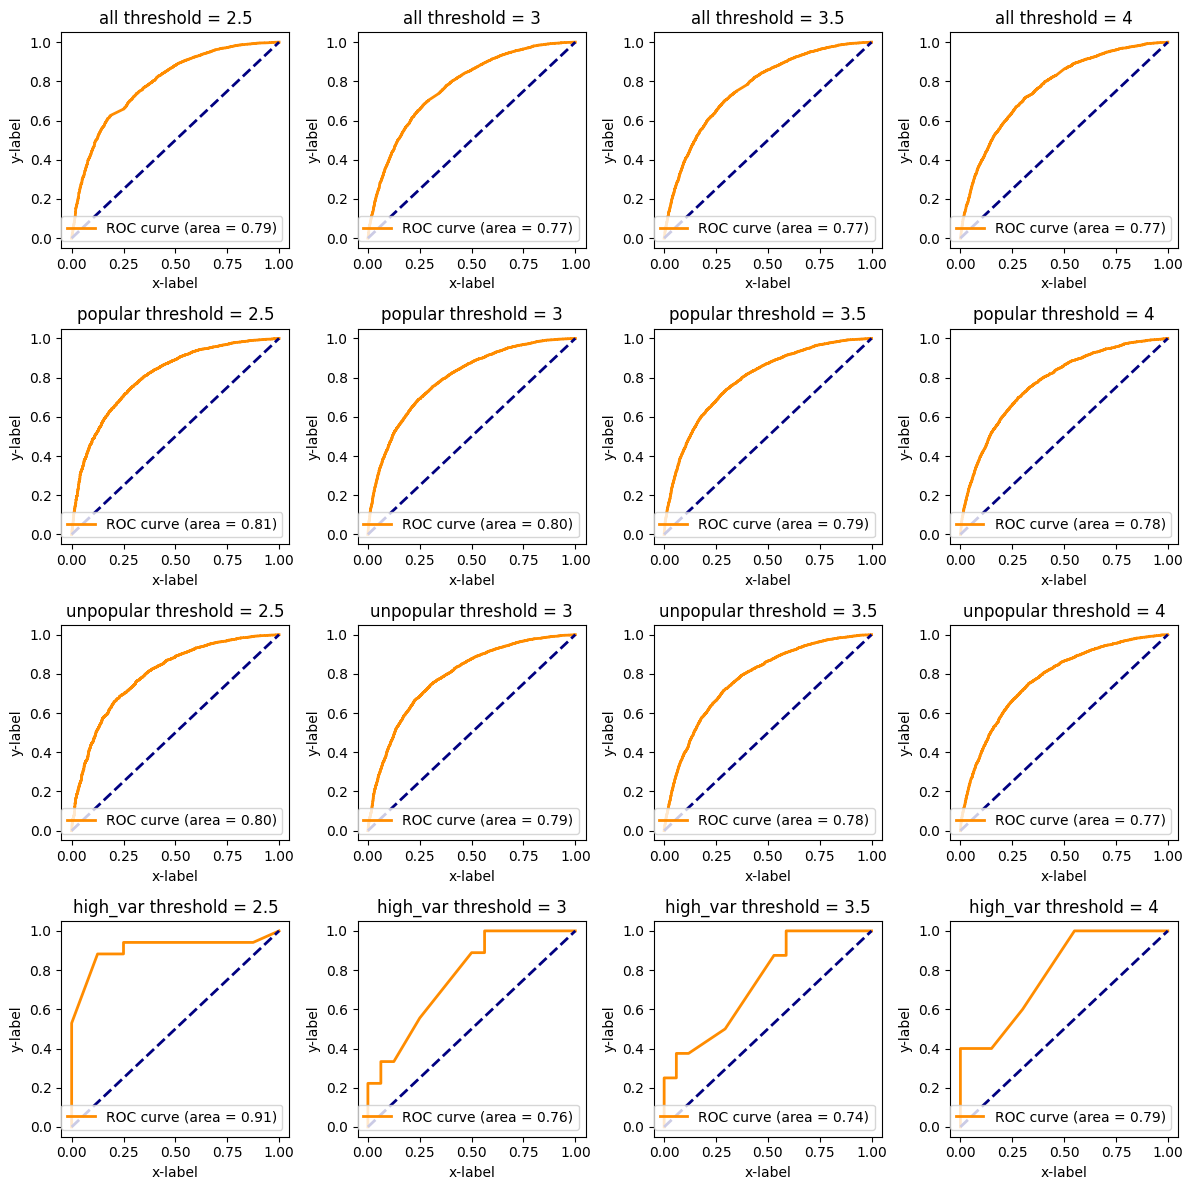

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Thresholds
thresholds = [2.5, 3, 3.5, 4]
fig, axs = plt.subplots(4, 4, figsize=(12, 12))
i=0
for keyword in keywords:
  np_rating_true = np.array(rating_true[keyword])
  np_rating_predict = np.array(rating_predict[keyword])
  j=0
  for threshold in thresholds:
    print(np_rating_true.shape)
    fpr, tpr, _ = roc_curve(np_rating_true>threshold, np_rating_predict)
    roc_auc = auc(fpr, tpr)

    # Plot figure
    print('ROC with threshold = ', threshold)
    axs[i,j].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    axs[i,j].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[i,j].set_title('{} threshold = {}'.format(keyword, threshold))
    axs[i,j].legend(loc="lower right")
    j = j+1
    #axs[i,j].plo
    #plt.savefig('Figures/Question15_threshold_%.1f.png' % threshold)  # Save the figure
  i = i+1
for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')
plt.tight_layout()
plt.show()

QUESTION 7: Understanding the NMF cost function

Equation 5 is not convex, because the calculation of matrix factorization is by multiplying U and V, and this process lacks convexity as the objective function is invariant to permutations and rotations. Hence there are multiple local minimums in the objective function gradient plane.
With U fixed, the formula can be transferred into $min_V \sum_{i=1} \sum_{j=1}W_{ij}[r_{ij}-(UV^T)_{ij}]^2, V=(UU^T)^{-1}UR$ as a weighted least squares problem.

QUESTION 8: Designing the NMF Collaborative Filter

In [ ]:
from surprise import NMF
from surprise.model_selection import cross_validate

# Swipe k from 2 to 50 in step sizes of 2
ks = range(2, 52, 2)

# Store mean RMSE and MAE
RMSEs = []
MAEs = []

for k in ks:
    # Use NMF
    algo = NMF(n_factors=k, reg_pu=0.04, reg_qi=0.04)

    # Cross validation
    print(k)
    result_dict = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, n_jobs = 10, verbose=False)
    RMSEs.append(np.average(result_dict['test_rmse']))
    MAEs.append(np.average(result_dict['test_mae']))

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50


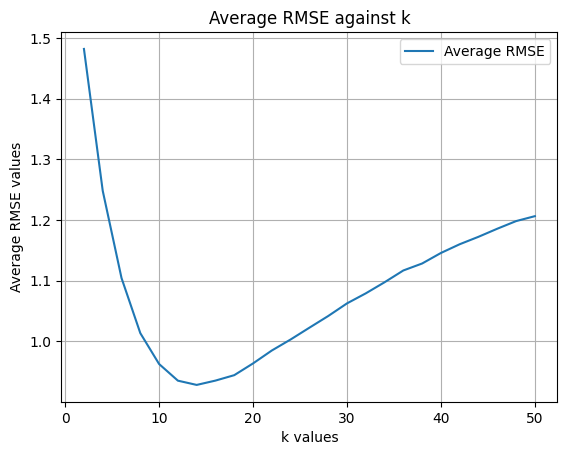

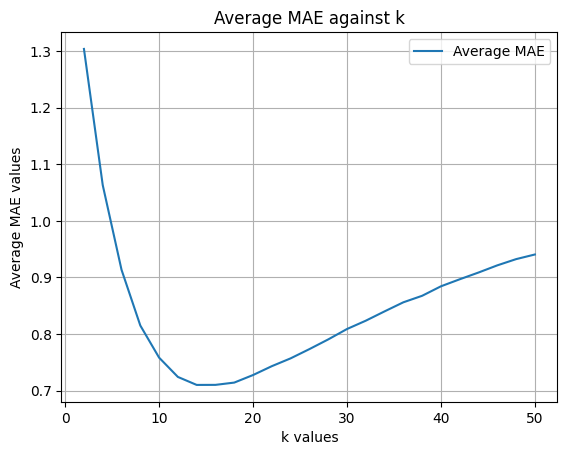

In [ ]:
plt.figure(1)
plt.title("Average RMSE against k")
plt.plot(ks, RMSEs, label='Average RMSE')
plt.xlabel('k values')
plt.ylabel('Average RMSE values')
plt.legend()
plt.grid()
plt.show()

# Plot the MAE graph
plt.figure(2)
plt.title("Average MAE against k")
plt.plot(ks, MAEs, label='Average MAE')
plt.xlabel('k values')
plt.ylabel('Average MAE values')
plt.legend()
plt.grid()
plt.show()

In [ ]:
RMSEs

[1.48199426772214,
 1.24803766930714,
 1.1041832306307575,
 1.0133447039218542,
 0.9624542585833723,
 0.9350009332125031,
 0.9279819043287192,
 0.9351246897231954,
 0.9440603261948646,
 0.9634367036076421,
 0.9847498157467299,
 1.0028963065361762,
 1.0223481106662722,
 1.0415821082508434,
 1.0624039825097387,
 1.078959972352242,
 1.0972518869566887,
 1.1167050529606197,
 1.1281870431379202,
 1.1455527262172924,
 1.1599560641718618,
 1.172225974944833,
 1.1855267638907863,
 1.1980897940472846,
 1.2062294760878662]

In [ ]:
ks = range(8, 40, 2)

# Store mean RMSE and MAE

Trim_RMSEs = {}
Trim_MAEs = {}

for keyword in ['popular', 'unpopular', 'high_var']:
  print(keyword)
  trim_data = get_data(keyword)
  RMSEs = []
  MAEs = []
  for k in ks:
    # Use NMF
    algo = NMF(n_factors=k, reg_pu=0.04, reg_qi=0.04)
    # Cross validation
    print(k)
    result_dict = cross_validate(algo, trim_data, measures=['RMSE', 'MAE'], cv=10, n_jobs = 10, verbose=False)
    RMSEs.append(np.average(result_dict['test_rmse']))
    MAEs.append(np.average(result_dict['test_mae']))
  Trim_RMSEs[keyword] = RMSEs
  Trim_MAEs[keyword] = MAEs

popular
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
unpopular
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
high_var
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38


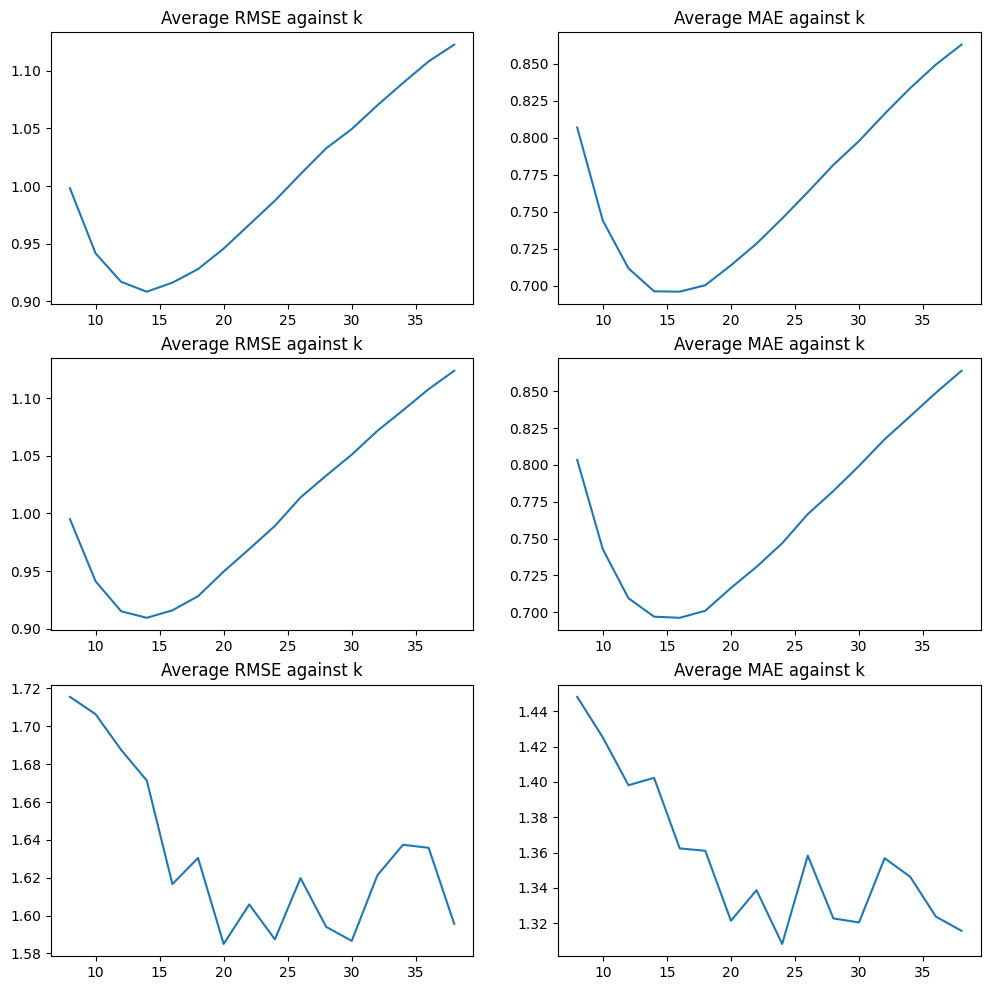

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
i=0
for keyword in ['popular', 'unpopular', 'high_var']:
  axs[i,0].set_title("Average RMSE against k")
  axs[i,0].plot(ks, Trim_RMSEs[keyword], label='Average RMSE')

  # Plot the MAE graph
  axs[i,1]
  axs[i,1].set_title("Average MAE against k")
  axs[i,1].plot(ks, Trim_MAEs[keyword], label='Average MAE')
  i+=1
plt.show()

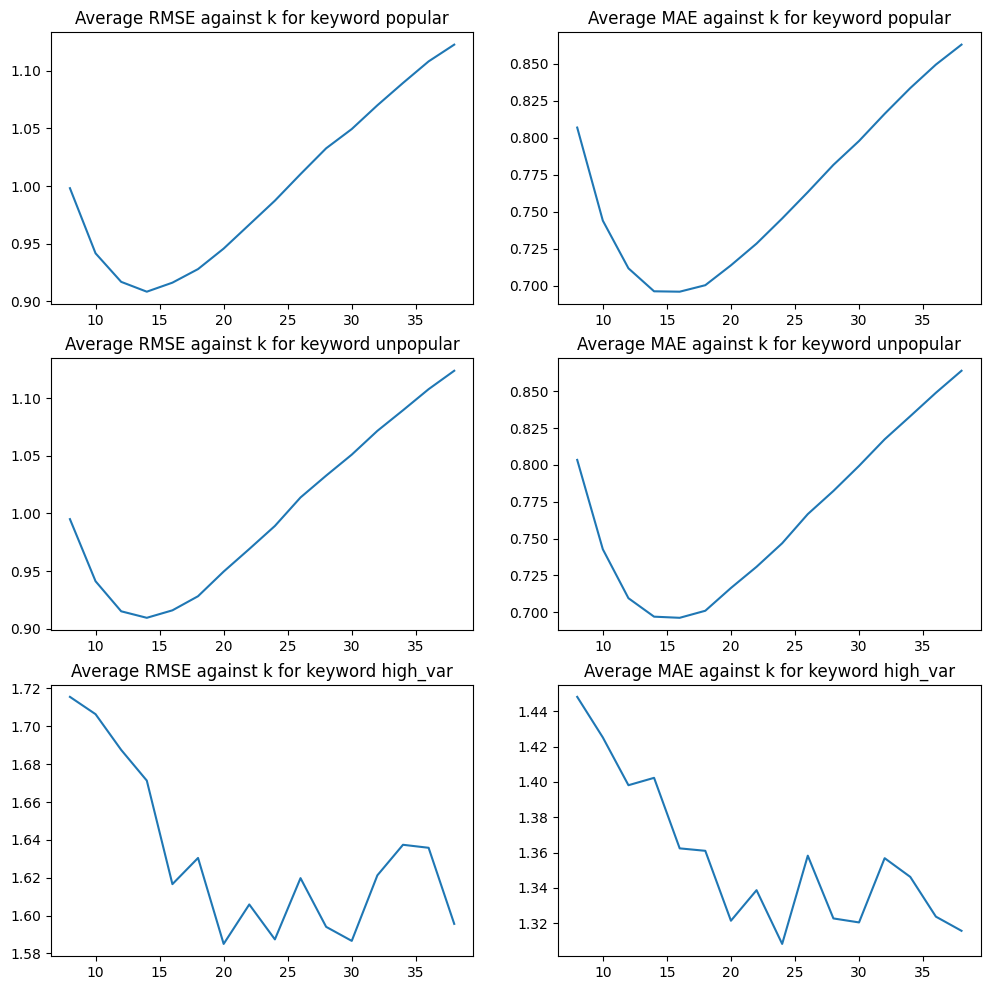

In [ ]:
ks = range(8, 40, 2)
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
i=0
for keyword in ['popular', 'unpopular', 'high_var']:
  axs[i,0].set_title("Average RMSE against k for keyword " + keyword)
  axs[i,0].plot(ks, Trim_RMSEs[keyword], label='Average RMSE')

  # Plot the MAE graph
  axs[i,1]
  axs[i,1].set_title("Average MAE against k for keyword " + keyword)
  axs[i,1].plot(ks, Trim_MAEs[keyword], label='Average MAE')
  i+=1
plt.show()

In [ ]:
for keyword in ['popular', 'unpopular', 'high_var']:
  print("min RMSE is {} for keyword {}".format(np.min(Trim_RMSEs[keyword]), keyword))

min RMSE is 0.9083412425862987 for keyword popular
min RMSE is 0.9093701130788256 for keyword unpopular
min RMSE is 1.585049865863104 for keyword high_var


optimum k seems to be 16 in this case

In [ ]:
from surprise.model_selection import train_test_split
from surprise import NMF

# The k in Question10

keywords = ['all', 'popular', 'unpopular', 'high_var']
k = 16

rating_true_NMF = {}
rating_predict_NMF = {}
for keyword in keywords:
  print(keyword)
  trim_data = get_data(keyword)
  trainset, testset = train_test_split(trim_data, test_size=.1)
  algo = NMF(n_factors=k, reg_pu=0.04, reg_qi=0.04)
  predictions = algo.fit(trainset).test(testset)
# Store true ratings and predicted ratings
  rating_true_arr = []
  rating_predict_arr = []

  for prediction in predictions:
      rating_true_arr.append(prediction[2])
      rating_predict_arr.append(prediction[3])

  rating_true_NMF[keyword] = rating_true_arr
  rating_predict_NMF[keyword] = rating_predict_arr
  algos[keyword] = algo

all
popular
unpopular
high_var


ROC with threshold =  3
ROC with threshold =  3
ROC with threshold =  3
ROC with threshold =  3


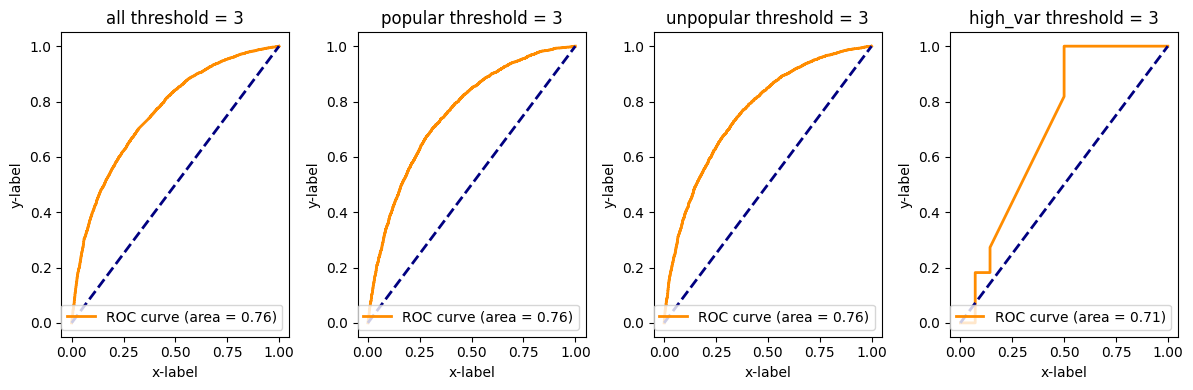

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Thresholds
threshold = 3
fig, axs = plt.subplots(1, 4, figsize=(12,4))
j=0
for keyword in keywords:
  np_rating_true = np.array(rating_true_NMF[keyword])
  np_rating_predict = np.array(rating_predict_NMF[keyword])
  fpr, tpr, _ = roc_curve(np_rating_true>threshold, np_rating_predict)
  roc_auc = auc(fpr, tpr)

  # Plot figure
  print('ROC with threshold = ', threshold)
  axs[j].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  axs[j].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  axs[j].set_title('{} threshold = {}'.format(keyword, threshold))
  axs[j].legend(loc="lower right")
    #axs[i,j].plo
    #plt.savefig('Figures/Question15_threshold_%.1f.png' % threshold)  # Save the figure
  j = j+1
for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')
plt.tight_layout()
plt.show()

QUESTION 9: Interpreting the NMF model

In [ ]:
import csv
datareader = csv.reader(open('movies.csv', 'r'), delimiter=',')

In [ ]:
from surprise import NMF

# Get movie ID
#np_movie_ids = np.array(data.raw_ratings)
#np_movie_ids = np_movie_ids[:, 1]
# sorted_movie_ids = np.sort(movie_ids.astype(np.int32))

# Use the whole set
trainset = data.build_full_trainset()


# Perform NMF
algo = NMF(n_factors=20)
algo.fit(trainset)

In [ ]:

# Get the V matrix and print the largest 10 IDs
for i in range(20):
    print('\nFor column %d, the top 10 movie ids:' % i)
    V = algo.qi.copy()
    # get raw movie id list
    movie_raw_ids = [trainset.to_raw_iid(iiid) for iiid in np.argsort(V[:, i])[-10:]]
    # get genre
    genres = movies_df[movies_df['movieId'].isin(movie_raw_ids)]
    # for mid in movie_raw_ids:
    #     genre.append([movieinfo for movieinfo in movie_genres if mid in movieinfo][0][2])
    print(genres[["movieId", "genres"]].head(10))


For column 0, the top 10 movie ids:
      movieId                               genres
1133     1483                       Drama|Thriller
2492     3326                        Comedy|Sci-Fi
2852     3814                               Comedy
2991     4006  Adventure|Animation|Children|Sci-Fi
3917     5504                   Adventure|Children
4003     5650                               Comedy
4009     5666        Comedy|Drama|Romance|Thriller
4195     6055                                Drama
6059    40697                               Sci-Fi
7177    72171                        Action|Comedy

For column 1, the top 10 movie ids:
      movieId                 genres
683       901         Comedy|Musical
932      1232   Drama|Mystery|Sci-Fi
1533     2068  Drama|Fantasy|Mystery
1887     2506   Comedy|Drama|Romance
2034     2709        Children|Comedy
3432     4676                 Comedy
3688     5080                 Comedy
5886    33171          Drama|Mystery
7177    72171          Action|Co

QUESTION 10: Designing the MF Collaborative Filter

In [ ]:
from surprise.prediction_algorithms.matrix_factorization import SVD
ks = range(2, 52, 2)

# Store mean RMSE and MAE

Trim_RMSEs_SVD = {}
Trim_MAEs_SVD = {}

for keyword in ['all', 'popular', 'unpopular', 'high_var']:
  print(keyword)
  trim_data = get_data(keyword)
  RMSEs = []
  MAEs = []
  for k in ks:
    algo = SVD(n_factors=k, random_state=42)
    # Cross validation
    print(k)
    result_dict = cross_validate(algo, trim_data, measures=['RMSE', 'MAE'], cv=10, n_jobs = 10, verbose=False)
    RMSEs.append(np.average(result_dict['test_rmse']))
    MAEs.append(np.average(result_dict['test_mae']))
  Trim_RMSEs_SVD[keyword] = RMSEs
  Trim_MAEs_SVD[keyword] = MAEs

all
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
popular
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
unpopular
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
high_var
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50


In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(12, 12))
i=0
for keyword in keywords:
  axs[i,0].set_title("Average RMSE against k")
  axs[i,0].plot(ks, Trim_RMSEs_SVD[keyword], label='Average RMSE')

  # Plot the MAE graph
  axs[i,1]
  axs[i,1].set_title("Average MAE against k")
  axs[i,1].plot(ks, Trim_MAEs_SVD[keyword], label='Average MAE')
  i+=1

plt.show()

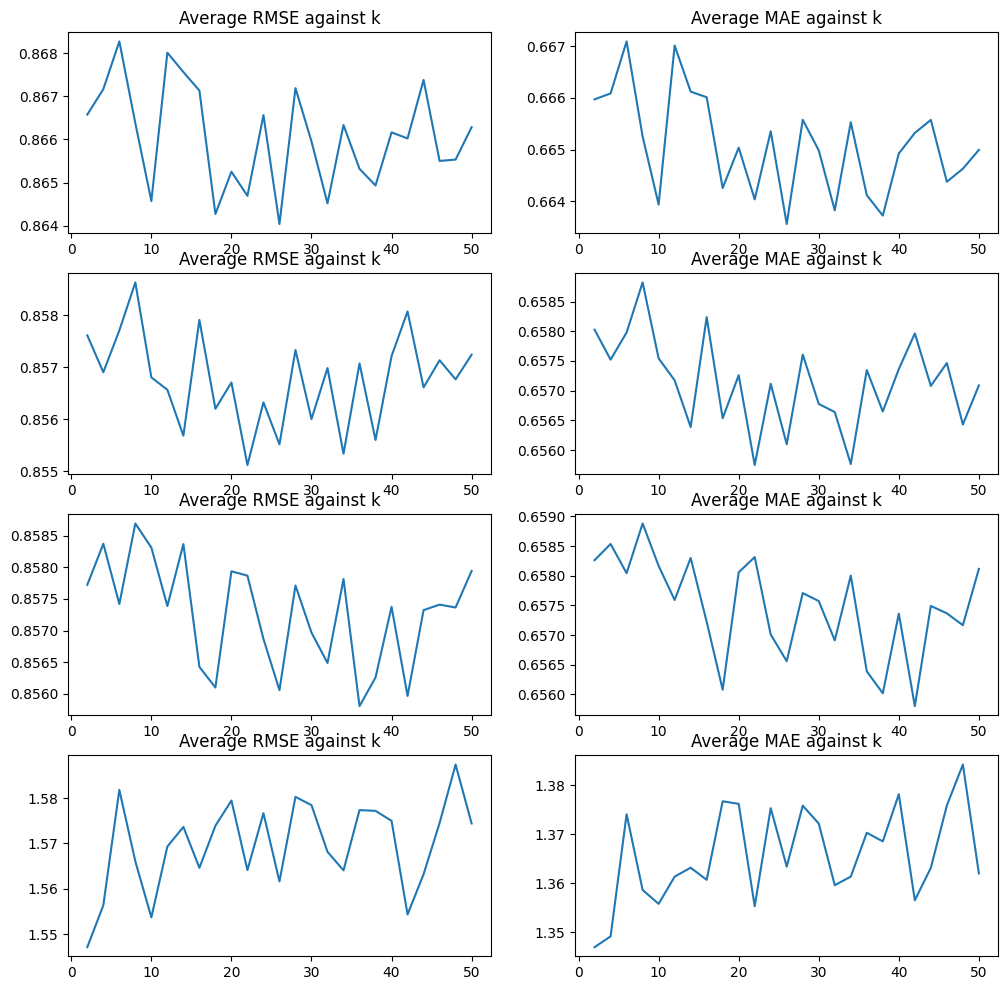

In [ ]:
k = np.argmin(Trim_RMSEs_SVD['all'])*2

k is 24

In [ ]:
from surprise.model_selection import train_test_split
from surprise import NMF

keywords = ['all', 'popular', 'unpopular', 'high_var']
k = 24

rating_true_SVD = {}
rating_predict_SVD = {}
for keyword in keywords:
  print(keyword)
  trim_data = get_data(keyword)
  trainset, testset = train_test_split(trim_data, test_size=.1)
  algo = SVD(n_factors=k, random_state=42)
  predictions = algo.fit(trainset).test(testset)
# Store true ratings and predicted ratings
  rating_true_arr = []
  rating_predict_arr = []

  for prediction in predictions:
      rating_true_arr.append(prediction[2])
      rating_predict_arr.append(prediction[3])

  rating_true_SVD[keyword] = rating_true_arr
  rating_predict_SVD[keyword] = rating_predict_arr
  algos[keyword] = algo

all
popular
unpopular
high_var


ROC with threshold =  3
ROC with threshold =  3
ROC with threshold =  3
ROC with threshold =  3


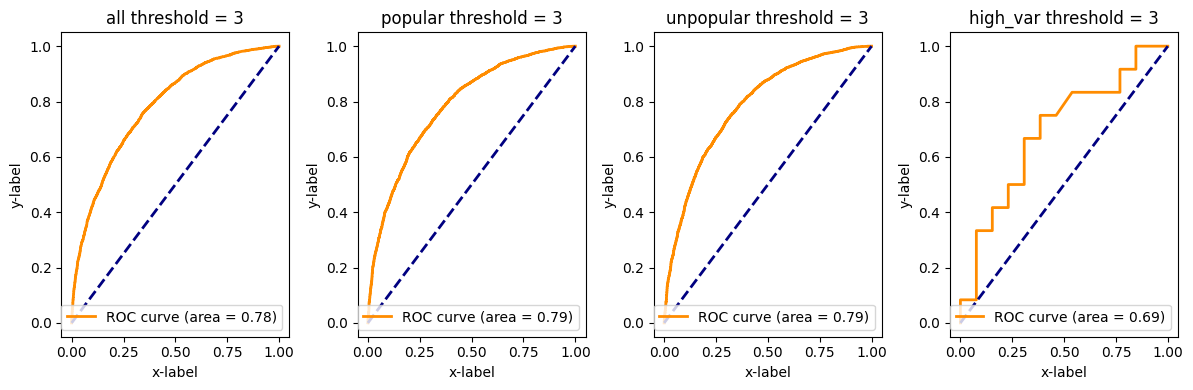

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Thresholds
threshold = 3
fig, axs = plt.subplots(1, 4, figsize=(12,4))
j=0
for keyword in keywords:
  np_rating_true = np.array(rating_true_SVD[keyword])
  np_rating_predict = np.array(rating_predict_SVD[keyword])
  fpr, tpr, _ = roc_curve(np_rating_true>threshold, np_rating_predict)
  roc_auc = auc(fpr, tpr)

  # Plot figure
  print('ROC with threshold = ', threshold)
  axs[j].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  axs[j].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  axs[j].set_title('{} threshold = {}'.format(keyword, threshold))
  axs[j].legend(loc="lower right")
    #axs[i,j].plo
    #plt.savefig('Figures/Question15_threshold_%.1f.png' % threshold)  # Save the figure
  j = j+1
for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')
plt.tight_layout()
plt.show()

(10084,)
ROC with threshold =  2.5
(10084,)
ROC with threshold =  3
(10084,)
ROC with threshold =  3.5
(10084,)
ROC with threshold =  4
(9480,)
ROC with threshold =  2.5
(9480,)
ROC with threshold =  3
(9480,)
ROC with threshold =  3.5
(9480,)
ROC with threshold =  4
(9480,)
ROC with threshold =  2.5
(9480,)
ROC with threshold =  3
(9480,)
ROC with threshold =  3.5
(9480,)
ROC with threshold =  4
(25,)
ROC with threshold =  2.5
(25,)
ROC with threshold =  3
(25,)
ROC with threshold =  3.5
(25,)
ROC with threshold =  4


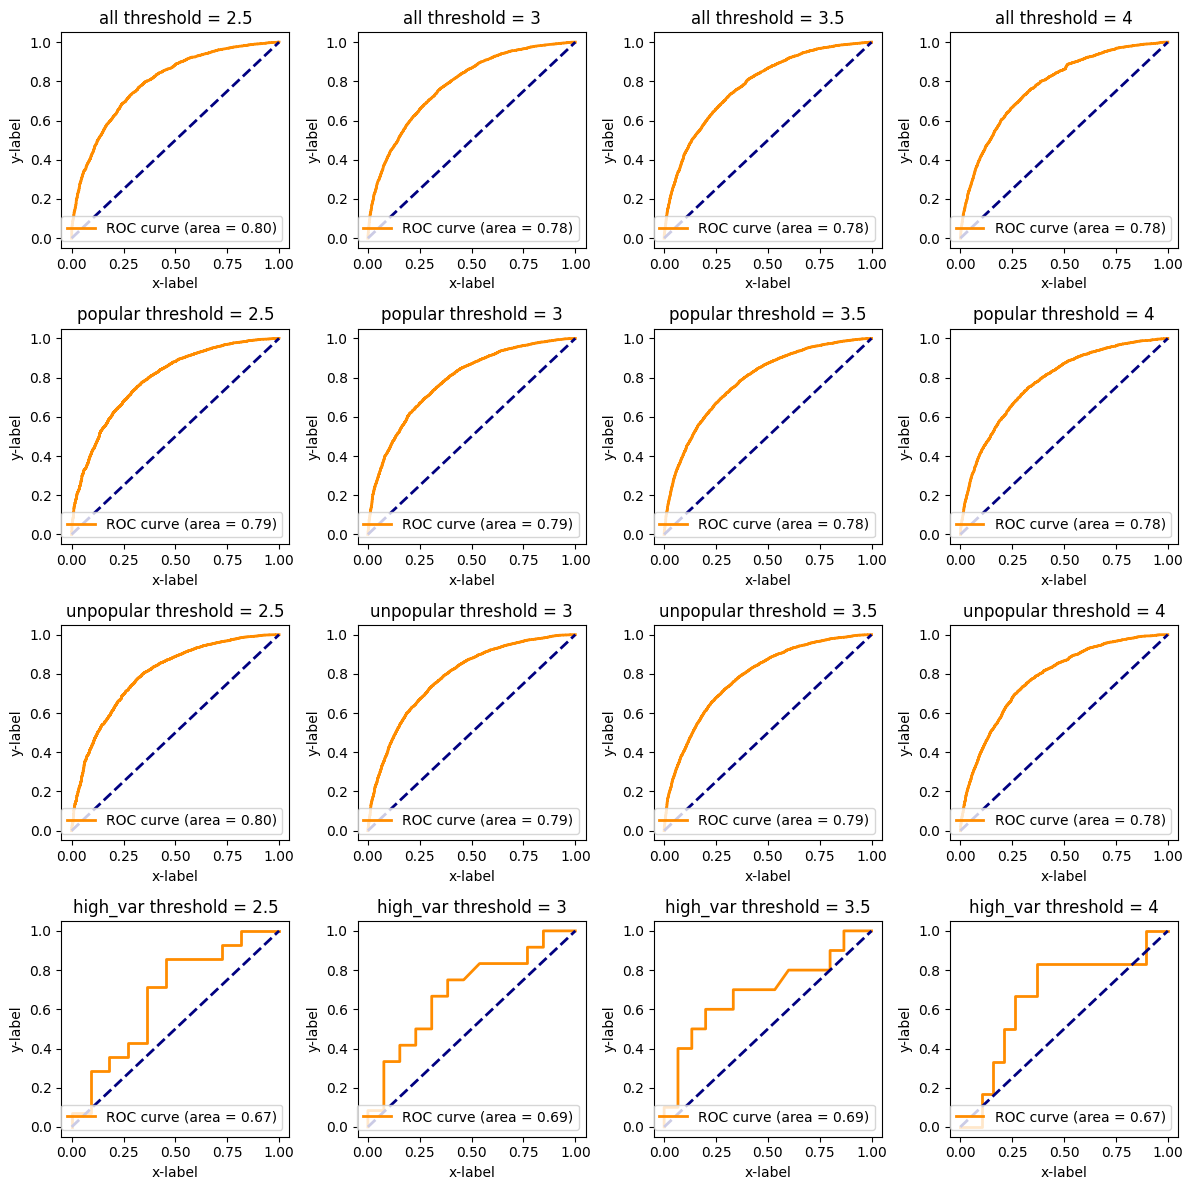

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Thresholds
thresholds = [2.5, 3, 3.5, 4]
fig, axs = plt.subplots(4, 4, figsize=(12, 12))
i=0
for keyword in keywords:
  np_rating_true = np.array(rating_true_SVD[keyword])
  np_rating_predict = np.array(rating_predict_SVD[keyword])
  j=0
  for threshold in thresholds:
    print(np_rating_true.shape)
    fpr, tpr, _ = roc_curve(np_rating_true>threshold, np_rating_predict)
    roc_auc = auc(fpr, tpr)

    # Plot figure
    print('ROC with threshold = ', threshold)
    axs[i,j].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    axs[i,j].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[i,j].set_title('{} threshold = {}'.format(keyword, threshold))
    axs[i,j].legend(loc="lower right")
    j = j+1
    #axs[i,j].plo
    #plt.savefig('Figures/Question15_threshold_%.1f.png' % threshold)  # Save the figure
  i = i+1
for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')
plt.tight_layout()
plt.show()

QUESTION 11: Designing a Na¨ıve Collaborative Filter

This question is done - AKanksha

In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 724.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162996 sha256=ad4cc1e130617c9f2bb49e9469e5860abd44c8b6fc0dfb26730ad1c0dd2e9f7e
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
from surprise import AlgoBase

class Naive(AlgoBase):
    def __init__(self):
        # Always call base method before doing anything.
        AlgoBase.__init__(self)

    def fit(self, trainset):
        # Here again: call base method before doing anything.
        AlgoBase.fit(self, trainset)
        # Compute the average rating. We might as well use the trainset.global_mean.
        self.the_mean = np.mean([r for (_, _, r) in
                                 self.trainset.all_ratings()])
        return self

    def estimate(self, u, i):
        return self.the_mean

In [ ]:
naive = Naive()
cv = cross_validate(naive, data, cv=KFold(n_splits=10, random_state=42))

In [ ]:
np.mean(cv['test_rmse']) # AVerage RMSE

1.0425213677372498

In [ ]:
Trim_RMSEs_Naive = {}
Trim_MAEs_Naive = {}

for keyword in ['all', 'popular', 'unpopular', 'high_var']:
  print(keyword)
  trim_data = get_data(keyword)
  RMSEs = []
  MAEs = []
  naive = Naive()
  result_dict = cross_validate(naive, trim_data, cv=KFold(n_splits=10, random_state=42))
  RMSEs.append(np.average(result_dict['test_rmse']))
  MAEs.append(np.average(result_dict['test_mae']))
  Trim_RMSEs_Naive[keyword] = RMSEs
  Trim_MAEs_Naive[keyword] = MAEs

all
popular
unpopular
high_var


In [ ]:
keywords = ['all', 'popular', 'unpopular', 'high_var']
for keyword in keywords:
  print(keyword + " avg RMSE : " +  str(np.mean(Trim_RMSEs_Naive[keyword])))

all avg RMSE : 1.0425213677372498
popular avg RMSE : 1.0354873646711593
unpopular avg RMSE : 1.0354873646711593
high_var avg RMSE : 1.6124534634607977


QUESTION 12: Comparing the most performant models across architecture

In [ ]:
print('Optimal k for KNN:', 24)
print('Optimal k for NNMF:', 16)
print('Optimal k for MF with bias:', 24)

Optimal k for KNN: 24
Optimal k for NNMF: 16
Optimal k for MF with bias: 24


for threshold 3, ROC curves are as follows :

KNN

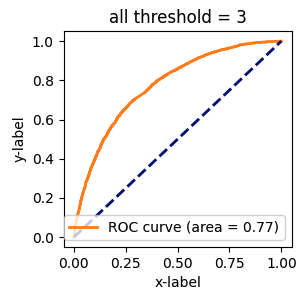

NMF

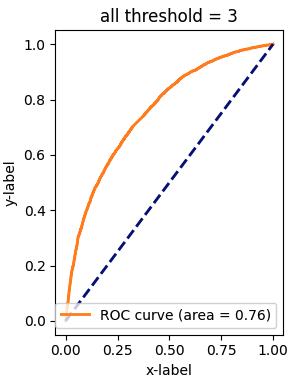

MF with bias

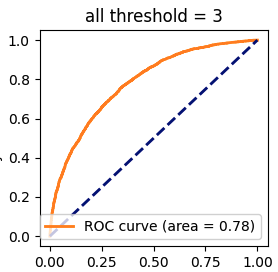

AUC is best for MF with bias model

QUESTION 13: Data Understanding and Preprocessing

In [ ]:
!pip install lightgbm
from sklearn.datasets import load_svmlight_file
from sklearn.metrics import ndcg_score
import numpy as np

In [ ]:
# Load the dataset for one fold
def load_one_fold(data_path):
    X_train, y_train, qid_train = load_svmlight_file(str(data_path + '/train.txt'), query_id=True)
    X_test, y_test, qid_test = load_svmlight_file(str(data_path + '/test.txt'), query_id=True)
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)
    _, group_train = np.unique(qid_train, return_counts=True)
    _, group_test = np.unique(qid_test, return_counts=True)
    return X_train, y_train, qid_train, group_train, X_test, y_test, qid_test, group_test

def ndcg_single_query(y_score, y_true, k):
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])

    gain = 2 ** y_true - 1

    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gain / discounts)

# calculate NDCG score given a trained model
def compute_ndcg_all(model, X_test, y_test, qids_test, k=10):
    unique_qids = np.unique(qids_test)
    ndcg_ = list()
    for i, qid in enumerate(unique_qids):
        y = y_test[qids_test == qid]

        if np.sum(y) == 0:
            continue

        p = model.predict(X_test[qids_test == qid])

        idcg = ndcg_single_query(y, y, k=k)
        ndcg_.append(ndcg_single_query(p, y, k=k) / idcg)
    return np.mean(ndcg_)

# get importance of features
def get_feature_importance(model, importance_type='gain'):
    return model.booster_.feature_importance(importance_type=importance_type)

# Function to load and preprocess data from a specific fold
def preprocess_mslr(data_path):
    X_train, y_train, qid_train, group_train, X_test, y_test, qid_test, group_test = load_one_fold(data_path)
    print("Number of Unique Queries in Training Set:", len(np.unique(qid_train)))
    print("Number of Unique Queries in Testing Set:", len(np.unique(qid_test)))

    print("\nDistribution of Relevance Labels in Training Set:")
    print(np.bincount(y_train))

    print("\nDistribution of Relevance Labels in Testing Set:")
    print(np.bincount(y_test))

In [ ]:
# Path to the specific fold
data_path = '/content/drive/MyDrive/MSLR-WEB10K/Fold1'

# Load and preprocess the data
preprocess_mslr(data_path)

Number of Unique Queries in Training Set: 6000
Number of Unique Queries in Testing Set: 2000

Distribution of Relevance Labels in Training Set:
[377957 232569  95082  12658   5146]

Distribution of Relevance Labels in Testing Set:
[124784  77896  32459   4450   1932]


QUESTION 14: LightGBM Model Training

In [ ]:
import lightgbm as lgb

# Function to train and evaluate the model on one fold
def train_and_evaluate_one_fold(data_path, fold_number):
    # Load data
    X_train, y_train, qid_train, group_train, X_test, y_test, qid_test, group_test = load_one_fold(data_path + f'/Fold{fold_number}')

    # Prepare dataset for LightGBM
    train_data = lgb.Dataset(X_train, label=y_train, group=group_train)
    test_data = lgb.Dataset(X_test, label=y_test, group=group_test)

    # Parameters for LightGBM
    params = {
        'objective': 'lambdarank',
        'learning_rate': 0.1,
        'num_leaves': 31,
        'metric': 'ndcg',
        'ndcg_eval_at': [3, 5, 10]
    }

    # Train the model
    model = lgb.train(params, train_data, valid_sets=[test_data])

    # Evaluate the model
    ndcg_at_3 = compute_ndcg_all(model, X_test, y_test, qid_test, k=3)
    ndcg_at_5 = compute_ndcg_all(model, X_test, y_test, qid_test, k=5)
    ndcg_at_10 = compute_ndcg_all(model, X_test, y_test, qid_test, k=10)

    print(f"Fold {fold_number}:")
    print(f"  nDCG@3: {ndcg_at_3}")
    print(f"  nDCG@5: {ndcg_at_5}")
    print(f"  nDCG@10: {ndcg_at_10}")

# Path to the MSLR-WEB10K dataset
data_path = '/content/drive/MyDrive/MSLR-WEB10K'

# Train and evaluate for each fold
for fold in range(1, 6):
    train_and_evaluate_one_fold(data_path, fold)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.440676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25637
[LightGBM] [Info] Number of data points in the train set: 723412, number of used features: 136
Fold 1:
  nDCG@3: 0.4564571300800643
  nDCG@5: 0.4632890672260867
  nDCG@10: 0.48286731451235976
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.703773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25623
[LightGBM] [Info] Number of data points in the train set: 716683, number of used features: 136
Fold 2:
  nDCG@3: 0.4538895365009714
  nDCG@5: 0.4573292117374164
  nDCG@10: 0.4767546810011047
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.461995 

QUESTION 15: Result Analysis and Interpretation

In [ ]:
import lightgbm as lgb

# Function to train and evaluate the model on one fold and print top 5 features
def train_and_evaluate_one_fold(data_path, fold_number):
    # Load data
    X_train, y_train, qid_train, group_train, X_test, y_test, qid_test, group_test = load_one_fold(data_path + f'/Fold{fold_number}')

    # Prepare dataset for LightGBM
    train_data = lgb.Dataset(X_train, label=y_train, group=group_train)
    test_data = lgb.Dataset(X_test, label=y_test, group=group_test)

    # Parameters for LightGBM
    params = {
        'objective': 'lambdarank',
        'learning_rate': 0.1,
        'num_leaves': 31,
        'metric': 'ndcg',
        'ndcg_eval_at': [3, 5, 10]
    }

    # Train the model
    model = lgb.train(params, train_data, valid_sets=[test_data])

    # Retrieve feature importance
    feature_importance = model.feature_importance(importance_type='gain')
    top_features = np.argsort(feature_importance)[::-1][:5]  # Indices of top 5 features

    print(f"Fold {fold_number} - Top 5 Features:")
    for i in top_features:
        print(f"  Feature {i + 1}: {feature_importance[i]}")

    # Evaluate the model (You can include the evaluation code here if needed)

# Path to the MSLR-WEB10K dataset
data_path = '/content/drive/MyDrive/MSLR-WEB10K'

# Train and evaluate for each fold
for fold in range(1, 6):
    train_and_evaluate_one_fold(data_path, fold)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.448754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25637
[LightGBM] [Info] Number of data points in the train set: 723412, number of used features: 136
Fold 1 - Top 5 Features:
  Feature 134: 23856.702950954437
  Feature 8: 4248.546391487122
  Feature 108: 4135.244449853897
  Feature 55: 4078.463216304779
  Feature 130: 3635.03702378273
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.503597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25623
[LightGBM] [Info] Number of data points in the train set: 716683, number of used features: 136
Fold 2 - Top 5 Features:
  Feature 134: 23578.90825009346
  Feature 8: 5157.964912414551
  Feature 55

QUESTION 16: Experiments with Subset of Features

In [ ]:
import lightgbm as lgb
from scipy import sparse

# Function to train and evaluate the model on one fold and return top and least important features
def train_and_evaluate_one_fold(data_path, fold_number):
    # Load data
    X_train, y_train, qid_train, group_train, X_test, y_test, qid_test, group_test = load_one_fold(data_path + f'/Fold{fold_number}')

    # Prepare dataset for LightGBM
    train_data = lgb.Dataset(X_train, label=y_train, group=group_train)
    test_data = lgb.Dataset(X_test, label=y_test, group=group_test)

    # Parameters for LightGBM
    params = {
        'objective': 'lambdarank',
        'learning_rate': 0.1,
        'num_leaves': 31,
        'metric': 'ndcg',
        'ndcg_eval_at': [3, 5, 10]
    }

    # Train the model
    model = lgb.train(params, train_data, valid_sets=[test_data])

    # Retrieve feature importance and sort features
    feature_importance = model.feature_importance(importance_type='gain')
    top_20_features = np.argsort(feature_importance)[::-1][:20]  # Indices of top 20 features
    least_60_features = np.argsort(feature_importance)[:60]  # Indices of least 60 features

    return top_20_features, least_60_features

def experiment_with_removed_features(data_path, features_to_remove):
    # Load data
    X_train, y_train, qid_train, group_train, X_test, y_test, qid_test, group_test = load_one_fold(data_path)

    # Convert to dense array if in sparse format
    X_train = X_train.todense() if hasattr(X_train, 'todense') else X_train
    X_test = X_test.todense() if hasattr(X_test, 'todense') else X_test

    # Remove specified features
    X_train = np.delete(X_train, features_to_remove, axis=1)
    X_test = np.delete(X_test, features_to_remove, axis=1)

    # Convert back to sparse format
    X_train = sparse.csr_matrix(X_train)
    X_test = sparse.csr_matrix(X_test)

    # Define parameters for LightGBM
    params = {
        'objective': 'lambdarank',
        'learning_rate': 0.1,
        'num_leaves': 31,
        'metric': 'ndcg',
        'ndcg_eval_at': [3, 5, 10]
    }

    # Prepare dataset for LightGBM
    train_data = lgb.Dataset(X_train, label=y_train, group=group_train)
    test_data = lgb.Dataset(X_test, label=y_test, group=group_test)

    # Train the model
    model = lgb.train(params, train_data, valid_sets=[test_data])

    # Compute nDCG score
    ndcg_score = compute_ndcg_all(model, X_test, y_test, qid_test, k=10)
    return ndcg_score

# Path to the MSLR-WEB10K dataset
data_path = '/content/drive/MyDrive/MSLR-WEB10K'

# Train, evaluate and get important features for each fold
for fold in range(1, 6):
    top_20, least_60 = train_and_evaluate_one_fold(data_path, fold)

    # Experiment 1: Remove Top 20 Features
    ndcg_score_top_20_removed = experiment_with_removed_features(data_path + f'/Fold{fold}', top_20)
    print(f"Fold {fold} - nDCG Score with Top 20 Features Removed: {ndcg_score_top_20_removed}")

    # Experiment 2: Remove 60 Least Important Features
    ndcg_score_least_60_removed = experiment_with_removed_features(data_path + f'/Fold{fold}', least_60)
    print(f"Fold {fold} - nDCG Score with 60 Least Important Features Removed: {ndcg_score_least_60_removed}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.434184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25637
[LightGBM] [Info] Number of data points in the train set: 723412, number of used features: 136
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.538521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 21582
[LightGBM] [Info] Number of data points in the train set: 723412, number of used features: 116
Fold 1 - nDCG Score with Top 20 Features Removed: 0.4083636029390886
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.228304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=